In [1]:
import os
os.environ['R_HOME']='/Library/Frameworks/R.framework/Resources'
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import rcParams
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.api import add_constant
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import scipy.stats
from sklearn.preprocessing import PolynomialFeatures
import scipy.special
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri, StrVector
from rpy2.robjects.conversion import localconverter

In [2]:
data = pd.read_csv('study_2_data.csv')
data=data.drop(labels=0,axis=0)
data=data.drop(labels=1,axis=0)

inclusions = []
for i in range(2,len(data)):
    if data.D_CompCheck[i] == 'Drol' or data.B_CompCheck[i] == 'Bricofly' or data.C_CompCheck[i] == 'Chapagite':
        inclusions = np.append(inclusions,[i])

exclusions = [x for x in np.arange(2,len(data)) if x not in inclusions]

data=data.drop(labels=exclusions,axis=0)


data = data[data.Status != 'Survey Preview']
data = data[data.Status != 'Survey Preview']
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropCoarseBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropFineHighBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropFineLowBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropCoarseBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropFineHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropFineLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropCoarseBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropFineHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_PropFineLowBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabCoarseBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabFineHighBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabFineLowBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabCoarseBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabFineHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabFineLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabCoarseBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabFineHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.B_StabFineLowBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropCoarseBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropFineHighBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropFineLowBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropCoarseBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropFineHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropFineLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropCoarseBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropFineHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_PropFineLowBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabCoarseBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabFineHighBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabFineLowBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabCoarseBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabFineHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabFineLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabCoarseBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabFineHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.C_StabFineLowBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropCoarseBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropFineHighBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropFineLowBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropCoarseBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropFineHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropFineLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropCoarseBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropFineHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_PropFineLowBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabCoarseBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabFineHighBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabFineLowBad55_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabCoarseBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabFineHighBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabFineLowBad85_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabCoarseBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabFineHighBad98_1 != s]
for i in range(0,4):
    s = str(i)
    data = data[data.D_StabFineLowBad98_1 != s]
data = data.reset_index()

In [3]:
def point_diverge1(x):
    return ((.01*.5)+(.55*.25)+((.55+x)*.25))*np.log2((.01*.5+.55*.25+(.55+x)*.25)/.55+x)

def point_diverge2(x):
    return ((.01*.5)+(.55*.25)+((.55+x)*.25))*np.log2((.01*.5+.55*.25+(.55+x)*.25)/.55)

def point_diverge3(x):
    return ((.01*.5)+(.55*.25)+((.55+x)*.25))*np.log2((.01*.5+.55*.25+(.55+x)*.25)/.01)

def point_diverge4(x):
    return (1-(.01*.5+.55*.25+(.55+x)*.25))*np.log2((1-(.01*.5+.55*.25+(.55+x)*.25))/(1-(.55+x)))

def point_diverge5(x):
    return (1-(.01*.5+.55*.25+(.55+x)*.25))*np.log2((1-(.01*.5+.55*.25+(.55+x)*.25))/.45)

def point_diverge6(x):
    return (1-(.01*.5+.55*.25+(.55+x)*.25))*np.log2((1-(.01*.5+.55*.25+(.55+x)*.25))/.99)

def loss1(x):
    return .25*(point_diverge1(x)+point_diverge4(x))+.25*(point_diverge2(x)+point_diverge5(x))+.5*(point_diverge3(x)+point_diverge6(x))

def point_diverge7(x):
    return (.01*.5+.55*.25+(.55+x)*.25)*np.log2((.01*.5+.55*.25+(.55+x)*.25)/((1.1+x)*.5))

def point_diverge8(x):
    return (.01*.5+.55*.25+(.55+x)*.25)*np.log2((.01*.5+.55*.25+(.55+x)*.25)/.01)

def point_diverge9(x):
    return (1-(.01*.5+.55*.25+(.55+x)*.25))*np.log2((1-(.01*.5+.55*.25+(.55+x)*.25))/(1-((1.1+x)*.5)))

def point_diverge10(x):
    return (1-(.01*.5+.55*.25+(.55+x)*.25))*np.log2((1-(.01*.5+.55*.25+(.55+x)*.25))/.99)

def loss2(x):
    return .5*(point_diverge7(x)+point_diverge8(x)) + .5*(point_diverge9(x)+point_diverge10(x))

def loss(x):
    return loss1(x)-loss2(x)

In [4]:
vignette = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        vignette = np.append(vignette,[-1])
    if data.Vignette[i] == 'Chapagite':
        vignette = np.append(vignette,[0])
    if data.Vignette[i] == 'Drol':
        vignette = np.append(vignette,[-1])
        
loss_vals = []
for i in range(0,len(data)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        loss_vals = np.append(loss_vals,[loss(0)])
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        loss_vals = np.append(loss_vals,[loss(.3)])
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        loss_vals = np.append(loss_vals,[loss(.43)])
        
causal_power_finehigh = []
for i in range(0,len(data)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        causal_power_finehigh = np.append(causal_power_finehigh,[.55-.28])
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        causal_power_finehigh = np.append(causal_power_finehigh,[.85-.28])
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        causal_power_finehigh = np.append(causal_power_finehigh,[.98-.28])
        
condition = []
for i in range(0,len(data)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Prop_Loss_2':
        condition = np.append(condition,[-1])
    if data.Group[i] == 'Stab_No_Loss' or data.Group[i] == 'Stab_Loss_1' or data.Group[i] == 'Stab_Loss_2':
        condition = np.append(condition,[1])
        
coarse_eval = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_eval = np.append(coarse_eval,[int(data.B_PropCoarseGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_eval = np.append(coarse_eval,[int(data.B_StabCoarseGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_eval = np.append(coarse_eval,[int(data.B_PropCoarseGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_eval = np.append(coarse_eval,[int(data.B_StabCoarseGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_eval = np.append(coarse_eval,[int(data.B_PropCoarseGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            coarse_eval = np.append(coarse_eval,[int(data.B_StabCoarseGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_eval = np.append(coarse_eval,[int(data.C_PropCoarseGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_eval = np.append(coarse_eval,[int(data.C_StabCoarseGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_eval = np.append(coarse_eval,[int(data.C_PropCoarseGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_eval = np.append(coarse_eval,[int(data.C_StabCoarseGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_eval = np.append(coarse_eval,[int(data.C_PropCoarseGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            coarse_eval = np.append(coarse_eval,[int(data.C_StabCoarseGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_eval = np.append(coarse_eval,[int(data.D_PropCoarseGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_eval = np.append(coarse_eval,[int(data.D_StabCoarseGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_eval = np.append(coarse_eval,[int(data.D_PropCoarseGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_eval = np.append(coarse_eval,[int(data.D_StabCoarseGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_eval = np.append(coarse_eval,[int(data.D_PropCoarseGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            coarse_eval = np.append(coarse_eval,[int(data.D_StabCoarseGood98_1[i])])
            
finehigh_eval = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            finehigh_eval = np.append(finehigh_eval,[int(data.B_PropFineHighGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finehigh_eval = np.append(finehigh_eval,[int(data.B_StabFineHighGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1': 
            finehigh_eval = np.append(finehigh_eval,[int(data.B_PropFineHighGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finehigh_eval = np.append(finehigh_eval,[int(data.B_StabFineHighGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finehigh_eval = np.append(finehigh_eval,[int(data.B_PropFineHighGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            finehigh_eval = np.append(finehigh_eval,[int(data.B_StabFineHighGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            finehigh_eval = np.append(finehigh_eval,[int(data.C_PropFineHighGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finehigh_eval = np.append(finehigh_eval,[int(data.C_StabFineHighGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            finehigh_eval = np.append(finehigh_eval,[int(data.C_PropFineHighGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finehigh_eval = np.append(finehigh_eval,[int(data.C_StabFineHighGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finehigh_eval = np.append(finehigh_eval,[int(data.C_PropFineHighGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            finehigh_eval = np.append(finehigh_eval,[int(data.C_StabFineHighGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            finehigh_eval = np.append(finehigh_eval,[int(data.D_PropFineHighGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finehigh_eval = np.append(finehigh_eval,[int(data.D_StabFineHighGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            finehigh_eval = np.append(finehigh_eval,[int(data.D_PropFineHighGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finehigh_eval = np.append(finehigh_eval,[int(data.D_StabFineHighGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finehigh_eval = np.append(finehigh_eval,[int(data.D_PropFineHighGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            finehigh_eval = np.append(finehigh_eval,[int(data.D_StabFineHighGood98_1[i])]) 
            

finelow_eval = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            finelow_eval = np.append(finelow_eval,[int(data.B_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finelow_eval = np.append(finelow_eval,[int(data.B_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1': 
            finelow_eval = np.append(finelow_eval,[int(data.B_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finelow_eval = np.append(finelow_eval,[int(data.B_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finelow_eval = np.append(finelow_eval,[int(data.B_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            finelow_eval = np.append(finelow_eval,[int(data.B_StabFineLowGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            finelow_eval = np.append(finelow_eval,[int(data.C_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finelow_eval = np.append(finelow_eval,[int(data.C_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            finelow_eval = np.append(finelow_eval,[int(data.C_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finelow_eval = np.append(finelow_eval,[int(data.C_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finelow_eval = np.append(finelow_eval,[int(data.C_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            finelow_eval = np.append(finelow_eval,[int(data.C_StabFineLowGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            finelow_eval = np.append(finelow_eval,[int(data.D_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finelow_eval = np.append(finelow_eval,[int(data.D_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            finelow_eval = np.append(finelow_eval,[int(data.D_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finelow_eval = np.append(finelow_eval,[int(data.D_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finelow_eval = np.append(finelow_eval,[int(data.D_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            finelow_eval = np.append(finelow_eval,[int(data.D_StabFineLowGood98_1[i])]) 

            
finehigh_finelow_diff = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_PropFineHighGood55_1[i])-int(data.B_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_StabFineHighGood55_1[i])-int(data.B_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_PropFineHighGood85_1[i])-int(data.B_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_StabFineHighGood85_1[i])-int(data.B_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_PropFineHighGood98_1[i])-int(data.B_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_StabFineHighGood98_1[i])-int(data.B_StabFineLowGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_PropFineHighGood55_1[i])-int(data.C_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_StabFineHighGood55_1[i])-int(data.C_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_PropFineHighGood85_1[i])-int(data.C_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_StabFineHighGood85_1[i])-int(data.C_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_PropFineHighGood98_1[i])-int(data.C_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
                finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_StabFineHighGood98_1[i])-int(data.C_StabFineLowGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_PropFineHighGood55_1[i])-int(data.D_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_StabFineHighGood55_1[i])-int(data.D_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_PropFineHighGood85_1[i])-int(data.D_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_StabFineHighGood85_1[i])-int(data.D_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_PropFineHighGood98_1[i])-int(data.D_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_StabFineHighGood98_1[i])-int(data.D_StabFineLowGood98_1[i])])
        
coarse_finehigh_diff = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.B_PropCoarseGood55_1[i])-int(data.B_PropFineHighGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.B_StabCoarseGood55_1[i])-int(data.B_StabFineHighGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.B_PropCoarseGood85_1[i])-int(data.B_PropFineHighGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.B_StabCoarseGood85_1[i])-int(data.B_StabFineHighGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.B_PropCoarseGood98_1[i])-int(data.B_PropFineHighGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.B_StabCoarseGood98_1[i])-int(data.B_StabFineHighGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.C_PropCoarseGood55_1[i])-int(data.C_PropFineHighGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.C_StabCoarseGood55_1[i])-int(data.C_StabFineHighGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.C_PropCoarseGood85_1[i])-int(data.C_PropFineHighGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.C_StabCoarseGood85_1[i])-int(data.C_StabFineHighGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.C_PropCoarseGood98_1[i])-int(data.C_PropFineHighGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
                coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.C_StabCoarseGood98_1[i])-int(data.C_StabFineHighGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.D_PropCoarseGood55_1[i])-int(data.D_PropFineHighGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.D_StabCoarseGood55_1[i])-int(data.D_StabFineHighGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.D_PropCoarseGood85_1[i])-int(data.D_PropFineHighGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.D_StabCoarseGood85_1[i])-int(data.D_StabFineHighGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.D_PropCoarseGood98_1[i])-int(data.D_PropFineHighGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            coarse_finehigh_diff = np.append(coarse_finehigh_diff,[int(data.D_StabCoarseGood98_1[i])-int(data.D_StabFineHighGood98_1[i])])
            
coarse_finelow_diff = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.B_PropCoarseGood55_1[i])-int(data.B_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.B_StabCoarseGood55_1[i])-int(data.B_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.B_PropCoarseGood85_1[i])-int(data.B_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.B_StabCoarseGood85_1[i])-int(data.B_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.B_PropCoarseGood98_1[i])-int(data.B_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.B_StabCoarseGood98_1[i])-int(data.B_StabFineLowGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.C_PropCoarseGood55_1[i])-int(data.C_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.C_StabCoarseGood55_1[i])-int(data.C_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.C_PropCoarseGood85_1[i])-int(data.C_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.C_StabCoarseGood85_1[i])-int(data.C_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.C_PropCoarseGood98_1[i])-int(data.C_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
                coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.C_StabCoarseGood98_1[i])-int(data.C_StabFineLowGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.D_PropCoarseGood55_1[i])-int(data.D_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.D_StabCoarseGood55_1[i])-int(data.D_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.D_PropCoarseGood85_1[i])-int(data.D_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.D_StabCoarseGood85_1[i])-int(data.D_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.D_PropCoarseGood98_1[i])-int(data.D_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            coarse_finelow_diff = np.append(coarse_finelow_diff,[int(data.D_StabCoarseGood98_1[i])-int(data.D_StabFineLowGood98_1[i])]) 
            
finehigh_finelow_diff = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_PropFineHighGood55_1[i])-int(data.B_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_StabFineHighGood55_1[i])-int(data.B_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_PropFineHighGood85_1[i])-int(data.B_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_StabFineHighGood85_1[i])-int(data.B_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_PropFineHighGood98_1[i])-int(data.B_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.B_StabFineHighGood98_1[i])-int(data.B_StabFineLowGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_PropFineHighGood55_1[i])-int(data.C_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_StabFineHighGood55_1[i])-int(data.C_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_PropFineHighGood85_1[i])-int(data.C_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_StabFineHighGood85_1[i])-int(data.C_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_PropFineHighGood98_1[i])-int(data.C_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
                finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.C_StabFineHighGood98_1[i])-int(data.C_StabFineLowGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_PropFineHighGood55_1[i])-int(data.D_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_No_Loss':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_StabFineHighGood55_1[i])-int(data.D_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_PropFineHighGood85_1[i])-int(data.D_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_StabFineHighGood85_1[i])-int(data.D_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_PropFineHighGood98_1[i])-int(data.D_PropFineLowGood98_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            finehigh_finelow_diff = np.append(finehigh_finelow_diff,[int(data.D_StabFineHighGood98_1[i])-int(data.D_StabFineLowGood98_1[i])])

coarse_avgfine_diff = []
for i in range(0,len(data)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.B_PropCoarseGood55_1[i])-.5*(int(data.B_PropFineHighGood55_1[i])-int(data.B_PropFineLowGood55_1[i]))])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.B_StabCoarseGood55_1[i])-.5*(int(data.B_StabFineHighGood55_1[i])-int(data.B_StabFineLowGood55_1[i]))])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.B_PropCoarseGood85_1[i])-.5*(int(data.B_PropFineHighGood85_1[i])-int(data.B_PropFineLowGood85_1[i]))])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.B_StabCoarseGood85_1[i])-.5*(int(data.B_StabFineHighGood85_1[i])-int(data.B_StabFineLowGood85_1[i]))])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.B_PropCoarseGood98_1[i])-.5*(int(data.B_PropFineHighGood98_1[i])-int(data.B_PropFineLowGood98_1[i]))])
        if data.Group[i] == 'Stab_Loss_2':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.B_StabCoarseGood98_1[i])-.5*(int(data.B_StabFineHighGood98_1[i])-int(data.B_StabFineLowGood98_1[i]))])                                                         
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.C_PropCoarseGood55_1[i])-.5*(int(data.C_PropFineHighGood55_1[i])-int(data.C_PropFineLowGood55_1[i]))])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.C_StabCoarseGood55_1[i])-.5*(int(data.C_StabFineHighGood55_1[i])-int(data.C_StabFineLowGood55_1[i]))])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.C_PropCoarseGood85_1[i])-.5*(int(data.C_PropFineHighGood85_1[i])-int(data.C_PropFineLowGood85_1[i]))])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.C_StabCoarseGood85_1[i])-.5*(int(data.C_StabFineHighGood85_1[i])-int(data.C_StabFineLowGood85_1[i]))])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.C_PropCoarseGood98_1[i])-.5*(int(data.C_PropFineHighGood98_1[i])-int(data.C_PropFineLowGood98_1[i]))])
        if data.Group[i] == 'Stab_Loss_2':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.C_StabCoarseGood98_1[i])-.5*(int(data.C_StabFineHighGood98_1[i])-int(data.C_StabFineLowGood98_1[i]))])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.D_PropCoarseGood55_1[i])-.5*(int(data.D_PropFineHighGood55_1[i])-int(data.D_PropFineLowGood55_1[i]))])
        if data.Group[i] == 'Stab_No_Loss':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.D_StabCoarseGood55_1[i])-.5*(int(data.D_StabFineHighGood55_1[i])-int(data.D_StabFineLowGood55_1[i]))])
        if data.Group[i] == 'Prop_Loss_1':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.D_PropCoarseGood85_1[i])-.5*(int(data.D_PropFineHighGood85_1[i])-int(data.D_PropFineLowGood85_1[i]))])
        if data.Group[i] == 'Stab_Loss_1':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.D_StabCoarseGood85_1[i])-.5*(int(data.D_StabFineHighGood85_1[i])-int(data.D_StabFineLowGood85_1[i]))])
        if data.Group[i] == 'Prop_Loss_2':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.D_PropCoarseGood98_1[i])-.5*(int(data.D_PropFineHighGood98_1[i])-int(data.D_PropFineLowGood98_1[i]))])
        if data.Group[i] == 'Stab_Loss_2':
            coarse_avgfine_diff = np.append(coarse_avgfine_diff,[int(data.D_StabCoarseGood98_1[i])-.5*(int(data.D_StabFineHighGood98_1[i])-int(data.D_StabFineLowGood98_1[i]))])
                                                                                                                  

In [5]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),coarse_finelow_diff.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'Coarse_FineLow_Diff'])
mod = smf.ols(formula='Coarse_FineLow_Diff ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Coarse_FineLow_Diff   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     1.222
Date:                 Thu, 20 Jan 2022   Prob (F-statistic):              0.289
Time:                         14:08:04   Log-Likelihood:                -818.76
No. Observations:                  483   AIC:                             1654.
Df Residuals:                      475   BIC:                             1687.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

In [6]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),coarse_eval.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'Coarse_Eval'])
mod = smf.ols(formula='Coarse_Eval ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Coarse_Eval   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.258
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.269
Time:                        14:08:04   Log-Likelihood:                -804.29
No. Observations:                 483   AIC:                             1625.
Df Residuals:                     475   BIC:                             1658.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [7]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),coarse_finehigh_diff.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'Coarse_FineHigh_Diff'])
mod = smf.ols(formula='Coarse_FineHigh_Diff ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     Coarse_FineHigh_Diff   R-squared:                       0.212
Model:                              OLS   Adj. R-squared:                  0.200
Method:                   Least Squares   F-statistic:                     18.22
Date:                  Thu, 20 Jan 2022   Prob (F-statistic):           1.67e-21
Time:                          14:08:04   Log-Likelihood:                -810.38
No. Observations:                   483   AIC:                             1637.
Df Residuals:                       475   BIC:                             1670.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

In [8]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),finehigh_eval.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'FineHigh_Eval'])
mod = smf.ols(formula='FineHigh_Eval ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          FineHigh_Eval   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     18.32
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.29e-21
Time:                        14:08:04   Log-Likelihood:                -802.65
No. Observations:                 483   AIC:                             1621.
Df Residuals:                     475   BIC:                             1655.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

<ipython-input-9-94a8d0177295>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 50)


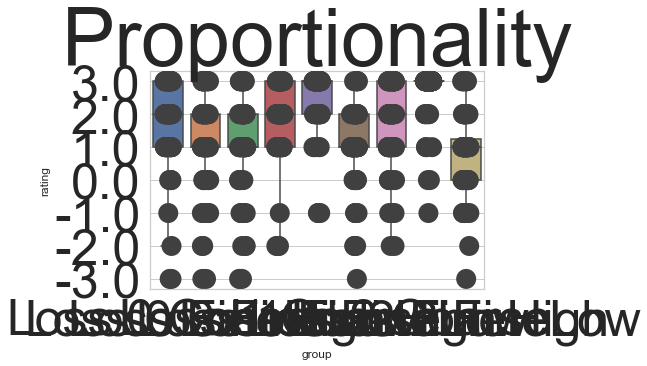

In [9]:
prop_rating = []
for i in range(0,len(data.Group)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Prop_No_Loss':
            prop_rating = np.append(prop_rating,[int(data.B_PropCoarseGood55_1[i])])
            prop_rating = np.append(prop_rating,[int(data.B_PropFineHighGood55_1[i])])
            prop_rating = np.append(prop_rating,[int(data.B_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            prop_rating = np.append(prop_rating,[int(data.B_PropCoarseGood85_1[i])])
            prop_rating = np.append(prop_rating,[int(data.B_PropFineHighGood85_1[i])])
            prop_rating = np.append(prop_rating,[int(data.B_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            prop_rating = np.append(prop_rating,[int(data.B_PropCoarseGood98_1[i])])
            prop_rating = np.append(prop_rating,[int(data.B_PropFineHighGood98_1[i])])
            prop_rating = np.append(prop_rating,[int(data.B_PropFineLowGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Prop_No_Loss':
            prop_rating = np.append(prop_rating,[int(data.C_PropCoarseGood55_1[i])])
            prop_rating = np.append(prop_rating,[int(data.C_PropFineHighGood55_1[i])])
            prop_rating = np.append(prop_rating,[int(data.C_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            prop_rating = np.append(prop_rating,[int(data.C_PropCoarseGood85_1[i])])
            prop_rating = np.append(prop_rating,[int(data.C_PropFineHighGood85_1[i])])
            prop_rating = np.append(prop_rating,[int(data.C_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            prop_rating = np.append(prop_rating,[int(data.C_PropCoarseGood98_1[i])])
            prop_rating = np.append(prop_rating,[int(data.C_PropFineHighGood98_1[i])])
            prop_rating = np.append(prop_rating,[int(data.C_PropFineLowGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Prop_No_Loss':
            prop_rating = np.append(prop_rating,[int(data.D_PropCoarseGood55_1[i])])
            prop_rating = np.append(prop_rating,[int(data.D_PropFineHighGood55_1[i])])
            prop_rating = np.append(prop_rating,[int(data.D_PropFineLowGood55_1[i])])
        if data.Group[i] == 'Prop_Loss_1':
            prop_rating = np.append(prop_rating,[int(data.D_PropCoarseGood85_1[i])])
            prop_rating = np.append(prop_rating,[int(data.D_PropFineHighGood85_1[i])])
            prop_rating = np.append(prop_rating,[int(data.D_PropFineLowGood85_1[i])])
        if data.Group[i] == 'Prop_Loss_2':
            prop_rating = np.append(prop_rating,[int(data.D_PropCoarseGood98_1[i])])
            prop_rating = np.append(prop_rating,[int(data.D_PropFineHighGood98_1[i])])
            prop_rating = np.append(prop_rating,[int(data.D_PropFineLowGood98_1[i])])

        
prop_group = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss':
        prop_group = np.append(prop_group,['Loss 0 Coarse','Loss 0 FineHigh', 'Loss 0 FineLow'])
    if data.Group[i] == 'Prop_Loss_1':
        prop_group = np.append(prop_group,['Loss 1 Coarse','Loss 1 FineHigh', 'Loss 1 FineLow'])
    if data.Group[i] == 'Prop_Loss_2':
        prop_group = np.append(prop_group,['Loss 2 Coarse','Loss 2 FineHigh', 'Loss 2 FineLow'])
        
df = pd.DataFrame({'rating': prop_rating, 'group': prop_group})


sns.set(style="whitegrid")

ax = sns.boxplot(x="group", y="rating", data=df, order=['Loss 0 Coarse','Loss 0 FineHigh', 'Loss 0 FineLow', 'Loss 1 Coarse','Loss 1 FineHigh', 'Loss 1 FineLow',\
                                                       'Loss 2 Coarse','Loss 2 FineHigh', 'Loss 2 FineLow'])
ax.set_xticklabels(ax.get_xticks(), size = 50)
ax.set_yticklabels(ax.get_yticks(), size = 50)
ax.set_title('Proportionality', size = 80)

ax = sns.stripplot(x="group", y="rating", data=df, color=".25", s=20, order=['Loss 0 Coarse','Loss 0 FineHigh', 'Loss 0 FineLow', 'Loss 1 Coarse','Loss 1 FineHigh', 'Loss 1 FineLow',\
                                                       'Loss 2 Coarse','Loss 2 FineHigh', 'Loss 2 FineLow'])
sns.set(rc = {'figure.figsize':(110,30)})


plt.savefig('prop_boxplot.png')
plt.show()

<ipython-input-10-662340f82857>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 50)


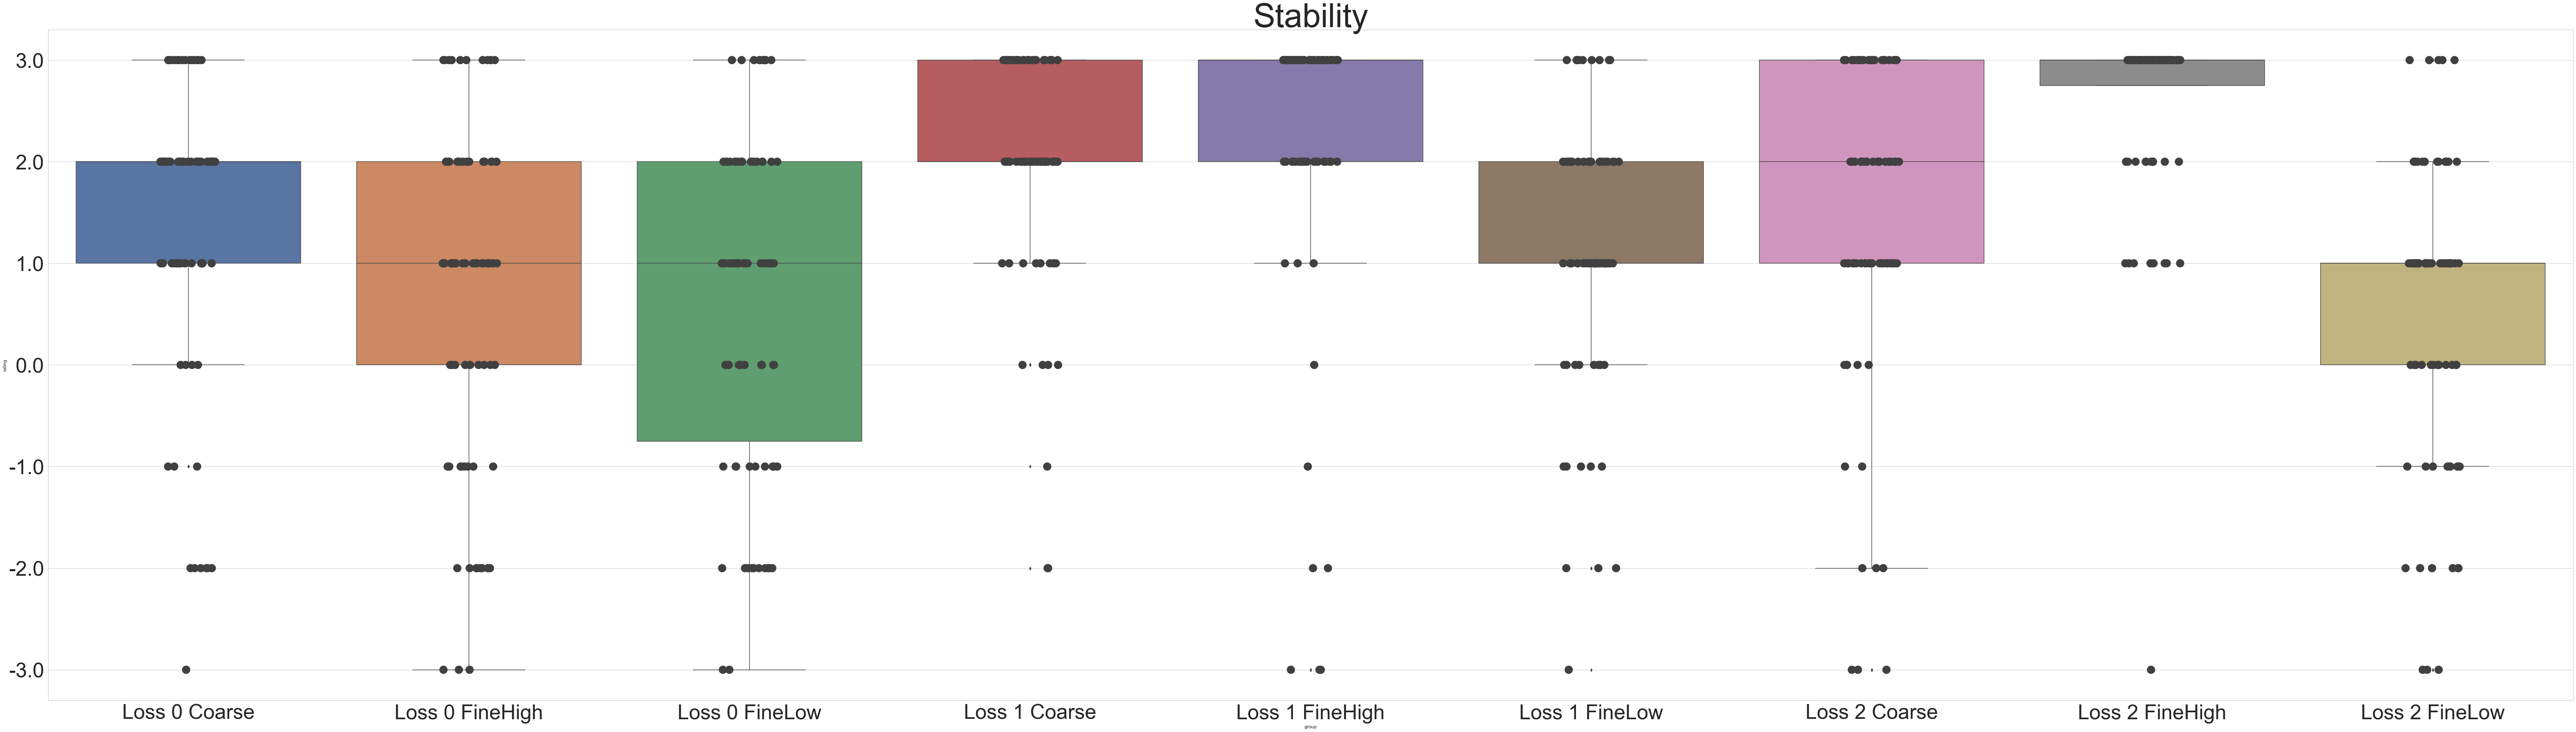

In [10]:
stab_rating = []
for i in range(0,len(data.Group)):
    if data.Vignette[i] == 'Bricofly':
        if data.Group[i] == 'Stab_No_Loss':
            stab_rating = np.append(stab_rating,[int(data.B_StabCoarseGood55_1[i])])
            stab_rating = np.append(stab_rating,[int(data.B_StabFineHighGood55_1[i])])
            stab_rating = np.append(stab_rating,[int(data.B_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            stab_rating = np.append(stab_rating,[int(data.B_StabCoarseGood85_1[i])])
            stab_rating = np.append(stab_rating,[int(data.B_StabFineHighGood85_1[i])])
            stab_rating = np.append(stab_rating,[int(data.B_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            stab_rating = np.append(stab_rating,[int(data.B_StabCoarseGood98_1[i])])
            stab_rating = np.append(stab_rating,[int(data.B_StabFineHighGood98_1[i])])
            stab_rating = np.append(stab_rating,[int(data.B_StabFineLowGood98_1[i])])
    if data.Vignette[i] == 'Chapagite':
        if data.Group[i] == 'Stab_No_Loss':
            stab_rating = np.append(stab_rating,[int(data.C_StabCoarseGood55_1[i])])
            stab_rating = np.append(stab_rating,[int(data.C_StabFineHighGood55_1[i])])
            stab_rating = np.append(stab_rating,[int(data.C_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            stab_rating = np.append(stab_rating,[int(data.C_StabCoarseGood85_1[i])])
            stab_rating = np.append(stab_rating,[int(data.C_StabFineHighGood85_1[i])])
            stab_rating = np.append(stab_rating,[int(data.C_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            stab_rating = np.append(stab_rating,[int(data.C_StabCoarseGood98_1[i])])
            stab_rating = np.append(stab_rating,[int(data.C_StabFineHighGood98_1[i])])
            stab_rating = np.append(stab_rating,[int(data.C_StabFineLowGood98_1[i])])
    if data.Vignette[i] == 'Drol':
        if data.Group[i] == 'Stab_No_Loss':
            stab_rating = np.append(stab_rating,[int(data.D_StabCoarseGood55_1[i])])
            stab_rating = np.append(stab_rating,[int(data.D_StabFineHighGood55_1[i])])
            stab_rating = np.append(stab_rating,[int(data.D_StabFineLowGood55_1[i])])
        if data.Group[i] == 'Stab_Loss_1':
            stab_rating = np.append(stab_rating,[int(data.D_StabCoarseGood85_1[i])])
            stab_rating = np.append(stab_rating,[int(data.D_StabFineHighGood85_1[i])])
            stab_rating = np.append(stab_rating,[int(data.D_StabFineLowGood85_1[i])])
        if data.Group[i] == 'Stab_Loss_2':
            stab_rating = np.append(stab_rating,[int(data.D_StabCoarseGood98_1[i])])
            stab_rating = np.append(stab_rating,[int(data.D_StabFineHighGood98_1[i])])
            stab_rating = np.append(stab_rating,[int(data.D_StabFineLowGood98_1[i])])

        
stab_group = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Stab_No_Loss':
        stab_group = np.append(stab_group,['Loss 0 Coarse','Loss 0 FineHigh', 'Loss 0 FineLow'])
    if data.Group[i] == 'Stab_Loss_1':
        stab_group = np.append(stab_group,['Loss 1 Coarse','Loss 1 FineHigh', 'Loss 1 FineLow'])
    if data.Group[i] == 'Stab_Loss_2':
        stab_group = np.append(stab_group,['Loss 2 Coarse','Loss 2 FineHigh', 'Loss 2 FineLow'])
        
df = pd.DataFrame({'rating': stab_rating, 'group': stab_group})


sns.set(style="whitegrid")

ax = sns.boxplot(x="group", y="rating", data=df, order=['Loss 0 Coarse','Loss 0 FineHigh', 'Loss 0 FineLow', 'Loss 1 Coarse','Loss 1 FineHigh', 'Loss 1 FineLow',\
                                                       'Loss 2 Coarse','Loss 2 FineHigh', 'Loss 2 FineLow'])
ax.set_xticklabels(ax.get_xticks(), size = 50)
ax.set_yticklabels(ax.get_yticks(), size = 50)
ax.set_title('Stability', size = 80)

ax = sns.stripplot(x="group", y="rating", data=df, color=".25", s=20, order=['Loss 0 Coarse','Loss 0 FineHigh', 'Loss 0 FineLow', 'Loss 1 Coarse','Loss 1 FineHigh', 'Loss 1 FineLow',\
                                                       'Loss 2 Coarse','Loss 2 FineHigh', 'Loss 2 FineLow'])
sns.set(rc = {'figure.figsize':(110,30)})


plt.savefig('stab_boxplot.png')
plt.show()

In [11]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),finehigh_finelow_diff.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'FineHigh_FineLow_Diff'])
mod = smf.ols(formula='FineHigh_FineLow_Diff ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                              OLS Regression Results                             
Dep. Variable:     FineHigh_FineLow_Diff   R-squared:                       0.306
Model:                               OLS   Adj. R-squared:                  0.295
Method:                    Least Squares   F-statistic:                     29.86
Date:                   Thu, 20 Jan 2022   Prob (F-statistic):           3.42e-34
Time:                           14:08:06   Log-Likelihood:                -750.36
No. Observations:                    483   AIC:                             1517.
Df Residuals:                        475   BIC:                             1550.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [12]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),coarse_avgfine_diff.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'Coarse_AvgFine_Diff'])
mod = smf.ols(formula='Coarse_AvgFine_Diff ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Coarse_AvgFine_Diff   R-squared:                       0.092
Model:                             OLS   Adj. R-squared:                  0.079
Method:                  Least Squares   F-statistic:                     6.880
Date:                 Thu, 20 Jan 2022   Prob (F-statistic):           8.32e-08
Time:                         14:08:06   Log-Likelihood:                -857.74
No. Observations:                  483   AIC:                             1731.
Df Residuals:                      475   BIC:                             1765.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

In [13]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),finelow_eval.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'FineLow_Eval'])
mod = smf.ols(formula='FineLow_Eval ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           FineLow_Eval   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     3.124
Date:                Thu, 20 Jan 2022   Prob (F-statistic):            0.00310
Time:                        14:08:06   Log-Likelihood:                -832.71
No. Observations:                 483   AIC:                             1681.
Df Residuals:                     475   BIC:                             1715.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [14]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),causal_power_finehigh.reshape(-1,1),coarse_finehigh_diff.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Causal_Power', 'Coarse_FineHigh_Diff'])
mod = smf.ols(formula='Coarse_FineHigh_Diff ~ Vignette + Condition + Causal_Power + Vignette:Condition + Vignette:Causal_Power + Condition:Causal_Power + Vignette:Causal_Power:Condition', data=df)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     Coarse_FineHigh_Diff   R-squared:                       0.234
Model:                              OLS   Adj. R-squared:                  0.222
Method:                   Least Squares   F-statistic:                     20.68
Date:                  Thu, 20 Jan 2022   Prob (F-statistic):           2.65e-24
Time:                          14:08:06   Log-Likelihood:                -803.58
No. Observations:                   483   AIC:                             1623.
Df Residuals:                       475   BIC:                             1657.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [15]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),causal_power_finehigh.reshape(-1,1),finehigh_eval.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Causal_Power', 'FineHigh_Eval'])
mod = smf.ols(formula='FineHigh_Eval ~ Vignette + Condition + Causal_Power + Vignette:Condition + Vignette:Causal_Power + Condition:Causal_Power + Vignette:Causal_Power:Condition', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          FineHigh_Eval   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     27.60
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           7.81e-32
Time:                        14:08:06   Log-Likelihood:                -777.96
No. Observations:                 483   AIC:                             1572.
Df Residuals:                     475   BIC:                             1605.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [16]:
arr = np.hstack((vignette.reshape(-1,1),condition.reshape(-1,1),loss_vals.reshape(-1,1),coarse_finelow_diff.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Vignette', 'Condition', 'Loss', 'Coarse_FineLow_Diff'])
mod = smf.ols(formula='Coarse_FineLow_Diff ~ Vignette + Condition + Loss + Vignette:Condition + Vignette:Loss + Condition:Loss + Vignette:Condition:Loss', data=df)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     Coarse_FineLow_Diff   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     1.222
Date:                 Thu, 20 Jan 2022   Prob (F-statistic):              0.289
Time:                         14:08:06   Log-Likelihood:                -818.76
No. Observations:                  483   AIC:                             1654.
Df Residuals:                      475   BIC:                             1687.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

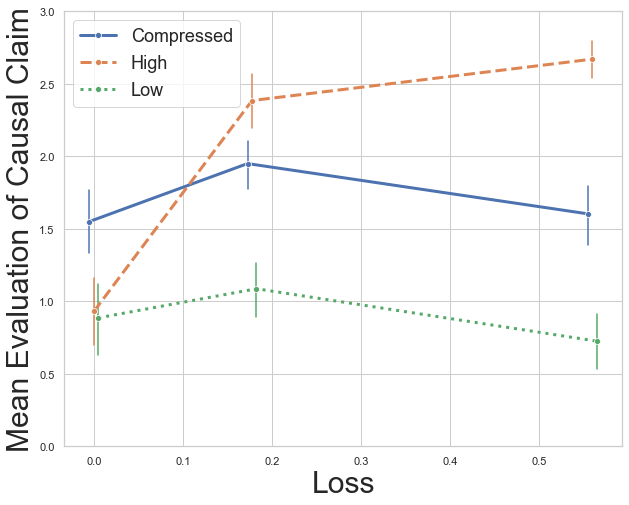

In [17]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.set_style("whitegrid")
ax = sns.lineplot(x=loss_vals-.005, y=coarse_eval, data=[coarse_eval,loss], marker='o', err_style='bars',ci=95,label="Compressed",linewidth=3)
ax = sns.lineplot(x=loss_vals, y=finehigh_eval, data=[coarse_eval,loss], marker='o', err_style='bars',ci=95,linestyle='dashed',label="High",linewidth=3)
ax = sns.lineplot(x=loss_vals+.005, y=finelow_eval, data=[coarse_eval,loss], marker='o', err_style='bars',ci=95,linestyle='dotted',label="Low",linewidth=3)
ax.set(ylim=(0,3))
ax.set_ylabel('Mean Evaluation of Causal Claim',fontsize=30)
ax.set_xlabel('Loss',fontsize=30)
plt.legend(fontsize=18)
plt.savefig('study2_barplot')

In [18]:
no_loss_compressed_preferrers=0
no_loss=0
for i in range(0,len(data.Group)):
    if loss_vals[i]<.1 and coarse_eval[i]>finehigh_eval[i]:
        no_loss_compressed_preferrers=no_loss_compressed_preferrers+1
    if loss_vals[i]<.1:
        no_loss=no_loss+1
        
moderate_loss_compressed_preferrers=0
moderate_loss=0
for i in range(0,len(data.Group)):
    if loss_vals[i]>.1 and loss_vals[i]<.2 and coarse_eval[i]>finehigh_eval[i]:
        moderate_loss_compressed_preferrers=moderate_loss_compressed_preferrers+1
    if loss_vals[i]>.1 and loss_vals[i]<.2:
        moderate_loss=moderate_loss+1
        
significant_loss_compressed_preferrers=0
significant_loss=0
for i in range(0,len(data.Group)):
    if loss_vals[i]>.5 and coarse_eval[i]>finehigh_eval[i]:
        significant_loss_compressed_preferrers=significant_loss_compressed_preferrers+1
    if loss_vals[i]>.5:
        significant_loss=significant_loss+1
        
[no_loss_compressed_preferrers/no_loss,moderate_loss_compressed_preferrers/moderate_loss,significant_loss_compressed_preferrers/significant_loss]

[0.3924050632911392, 0.09937888198757763, 0.024390243902439025]

In [19]:
subject_55=[]
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        subject_55 = np.append(subject_55,[i,i])

evals_55 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        evals_55 = np.append(evals_55,[coarse_eval[i],finehigh_eval[i]])
    
vignette_for_anova_55 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        vignette_for_anova_55 = np.append(vignette_for_anova_55,[vignette[i],vignette[i]])
    
condition_for_anova_55 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':                                                       
        condition_for_anova_55 = np.append(condition_for_anova_55,[condition[i],condition[i]])
    
loss_vals_for_anova_55 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':                                                      
        loss_vals_for_anova_55 = np.append(loss_vals_for_anova_55,[loss_vals[i],loss_vals[i]])
    
diff_type_55 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        diff_type_55 = np.append(diff_type_55,[-1,1])

arr = np.hstack((subject_55.reshape(-1,1),vignette_for_anova_55.reshape(-1,1),condition_for_anova_55.reshape(-1,1),loss_vals_for_anova_55.reshape(-1,1),evals_55.reshape(-1,1),diff_type_55.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval','Diff_Type'])

In [20]:
packageNames = ("afex", "emmeans")
utils = rpackages.importr("utils")
utils.chooseCRANmirror(ind=1)

packnames_to_install = [x for x in packageNames if not rpackages.isinstalled(x)]

if len(packnames_to_install) > 0:
    utils.install_packages(StrVector(packnames_to_install))

# convert pandas DF ("tmp") to R data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval
                        Effect     df  MSE         F   ges p.value
1                     Vignette 1, 154 3.33      0.94  .005    .334
2                    Condition 1, 154 3.33    2.79 +  .014    .097
3           Vignette:Condition 1, 154 3.33      0.01 <.001    .906
4                    Diff_Type 1, 154 0.89 29.06 ***  .038   <.001
5           Vignette:Diff_Type 1, 154 0.89      0.00 <.001    .952
6          Condition:Diff_Type 1, 154 0.89      0.74  .001    .391
7 Vignette:Condition:Diff_Type 1, 154 0.89      0.64 <.001    .426
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



In [21]:
evals_low_55 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_No_Loss' or data.Group[i] == 'Stab_No_Loss':
        evals_low_55 = np.append(evals_low_55,[coarse_eval[i],finelow_eval[i]])
        
        
arr = np.hstack((subject_55.reshape(-1,1),vignette_for_anova_55.reshape(-1,1),condition_for_anova_55.reshape(-1,1),loss_vals_for_anova_55.reshape(-1,1),evals_low_55.reshape(-1,1),diff_type_55.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval_Low','Diff_Type'])
        
# convert pandas DF ("tmp") to R data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval_Low",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval_Low ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval_Low
                        Effect     df  MSE         F   ges p.value
1                     Vignette 1, 154 3.34      0.08 <.001    .782
2                    Condition 1, 154 3.34    3.60 +  .018    .060
3           Vignette:Condition 1, 154 3.34      0.04 <.001    .848
4                    Diff_Type 1, 154 1.05 33.28 ***  .049   <.001
5           Vignette:Diff_Type 1, 154 1.05      1.66  .003    .200
6          Condition:Diff_Type 1, 154 1.05      1.46  .002    .229
7 Vignette:Condition:Diff_Type 1, 154 1.05      1.67  .003    .199
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



In [22]:
subject_85=[]
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        subject_85 = np.append(subject_85,[i,i])

evals_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        evals_85 = np.append(evals_85,[coarse_eval[i],finehigh_eval[i]])
    
vignette_for_anova_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        vignette_for_anova_85 = np.append(vignette_for_anova_85,[vignette[i],vignette[i]])
    
condition_for_anova_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':                                                       
        condition_for_anova_85 = np.append(condition_for_anova_85,[condition[i],condition[i]])
    
loss_vals_for_anova_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':                                                     
        loss_vals_for_anova_85 = np.append(loss_vals_for_anova_85,[loss_vals[i],loss_vals[i]])
    
diff_type_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        diff_type_85 = np.append(diff_type_85,[-1,1])

arr = np.hstack((subject_85.reshape(-1,1),vignette_for_anova_85.reshape(-1,1),condition_for_anova_85.reshape(-1,1),loss_vals_for_anova_85.reshape(-1,1),evals_85.reshape(-1,1),diff_type_85.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval','Diff_Type'])
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval
                        Effect     df  MSE         F   ges p.value
1                     Vignette 1, 157 1.90      0.78  .004    .380
2                    Condition 1, 157 1.90      2.09  .009    .151
3           Vignette:Condition 1, 157 1.90    3.97 *  .018    .048
4                    Diff_Type 1, 157 0.75 16.49 ***  .029   <.001
5           Vignette:Diff_Type 1, 157 0.75      0.09 <.001    .771
6          Condition:Diff_Type 1, 157 0.75    3.82 +  .007    .052
7 Vignette:Condition:Diff_Type 1, 157 0.75      0.00 <.001    .964
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



In [23]:
evals_low_85 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_1' or data.Group[i] == 'Stab_Loss_1':
        evals_low_85 = np.append(evals_low_85,[finehigh_eval[i],finelow_eval[i]])
        
        
arr = np.hstack((subject_85.reshape(-1,1),vignette_for_anova_85.reshape(-1,1),condition_for_anova_85.reshape(-1,1),loss_vals_for_anova_85.reshape(-1,1),evals_low_85.reshape(-1,1),diff_type_85.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval_Low','Diff_Type'])
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)
        
# convert pandas DF ("tmp") to R data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval_Low",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval_Low ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval_Low
                        Effect     df  MSE          F   ges p.value
1                     Vignette 1, 157 2.21     2.94 +  .014    .088
2                    Condition 1, 157 2.21     3.09 +  .015    .081
3           Vignette:Condition 1, 157 2.21     3.10 +  .015    .080
4                    Diff_Type 1, 157 0.69 153.01 ***  .188   <.001
5           Vignette:Diff_Type 1, 157 0.69     3.66 +  .006    .057
6          Condition:Diff_Type 1, 157 0.69       1.67  .003    .199
7 Vignette:Condition:Diff_Type 1, 157 0.69       0.01 <.001    .916
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



In [24]:
subject_98=[]
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        subject_98 = np.append(subject_98,[i,i])

evals_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        evals_98 = np.append(evals_98,[coarse_eval[i],finehigh_eval[i]])
    
vignette_for_anova_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        vignette_for_anova_98 = np.append(vignette_for_anova_98,[vignette[i],vignette[i]])
    
condition_for_anova_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':                                                       
        condition_for_anova_98 = np.append(condition_for_anova_98,[condition[i],condition[i]])
    
loss_vals_for_anova_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':                                                     
        loss_vals_for_anova_98 = np.append(loss_vals_for_anova_98,[loss_vals[i],loss_vals[i]])
    
diff_type_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        diff_type_98 = np.append(diff_type_98,[-1,1])

arr = np.hstack((subject_98.reshape(-1,1),vignette_for_anova_98.reshape(-1,1),condition_for_anova_98.reshape(-1,1),loss_vals_for_anova_98.reshape(-1,1),evals_98.reshape(-1,1),diff_type_98.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval','Diff_Type'])
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval
                        Effect     df  MSE         F  ges p.value
1                     Vignette 1, 160 1.68      0.85 .004    .358
2                    Condition 1, 160 1.68    4.12 * .017    .044
3           Vignette:Condition 1, 160 1.68      0.66 .003    .419
4                    Diff_Type 1, 160 0.84 85.72 *** .151   <.001
5           Vignette:Diff_Type 1, 160 0.84      1.29 .003    .257
6          Condition:Diff_Type 1, 160 0.84      2.20 .005    .140
7 Vignette:Condition:Diff_Type 1, 160 0.84      2.12 .004    .147
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1



In [25]:
evals_low_98 = []
for i in range(0,len(data.Group)):
    if data.Group[i] == 'Prop_Loss_2' or data.Group[i] == 'Stab_Loss_2':
        evals_low_98 = np.append(evals_low_98,[finehigh_eval[i],finelow_eval[i]])
        
        
arr = np.hstack((subject_98.reshape(-1,1),vignette_for_anova_98.reshape(-1,1),condition_for_anova_98.reshape(-1,1),loss_vals_for_anova_98.reshape(-1,1),evals_low_98.reshape(-1,1),diff_type_98.reshape(-1,1)))
df = pd.DataFrame(arr,columns=['Subject','Vignette', 'Condition', 'Loss', 'Eval_Low','Diff_Type'])
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)
        
# convert pandas DF ("tmp") to R data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_from_pd_df = ro.conversion.py2rpy(df)

r_from_pd_df.head()

afex = rpackages.importr("afex")

model = afex.aov_ez(
    id="Subject",
    dv="Eval_Low",
    between=["Vignette", "Condition"],
    within="Diff_Type",
    data=r_from_pd_df,
    check_contrasts=True,  # 3-way interaction is unaffected by this, "True" is recommended
    type=3,  # using so-called type 3 sums of squares
    print_formula=True,
)

print(model)

R[write to console]: Formula send to aov_car: Eval_Low ~ Vignette * Condition + Error(Subject/(Diff_Type))

R[write to console]: Converting to factor: Vignette, Condition

R[write to console]: Contrasts set to contr.sum for the following variables: Vignette, Condition



Anova Table (Type 3 tests)

Response: Eval_Low
                        Effect     df  MSE          F  ges p.value
1                     Vignette 1, 160 1.47     5.02 * .019    .026
2                    Condition 1, 160 1.47     5.77 * .022    .017
3           Vignette:Condition 1, 160 1.47       0.63 .002    .428
4                    Diff_Type 1, 160 0.85 273.89 *** .386   <.001
5           Vignette:Diff_Type 1, 160 0.85    7.69 ** .017    .006
6          Condition:Diff_Type 1, 160 0.85     3.15 + .007    .078
7 Vignette:Condition:Diff_Type 1, 160 0.85       1.81 .004    .180
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1

